# Demonstration of split-step Fourier propagation

This notebook demonstrates basic use of the split-step Fourier routines on a 2D example. A single particle with wavefuntion $\psi(x,y,t)$ moves in a deep potential well $V(x,y)$ shaped like an ellipse. The total Hamiltonian is thus
$$ H = -\frac{1}{2} \frac{\partial^2}{\partial x^2} -\frac{1}{2} \frac{\partial^2}{\partial y^2} + V(x,y) $$
and we are solving the time-dependent Schrödinger equation
$$ i \frac{\partial}{\partial t}\psi(x,y,t) = H \psi(x,y,t), \quad \psi(x,y,0) = \psi_0(x,y), $$
for $t \in [0,t_\text{final}]$ using the split-step Fourier method.

In [1]:
import numpy as np
from fft_tdse import *
from psiviz import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

## Setup
First, we set up the grid parameters and the external potential.

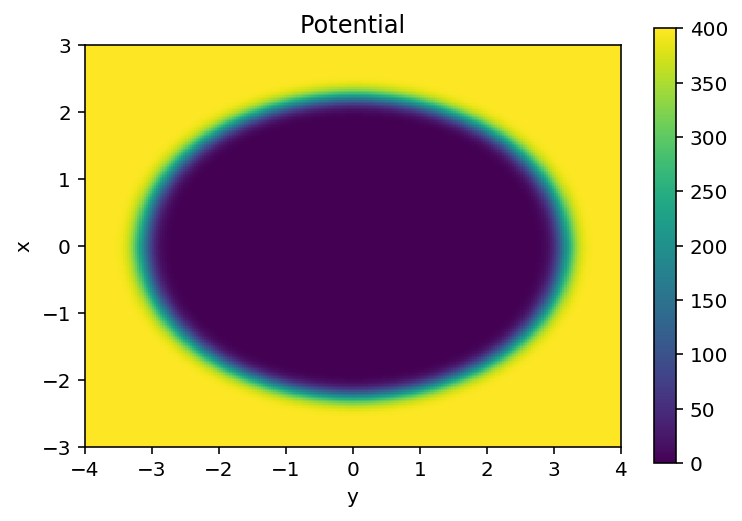

In [20]:
# Number of grid points in the x and y direction
ng = [256,256]
# a[0] <= x <= b[0], a[1] <= y <= b[1]
a = [-3,-4]
b = [3,4]
grid = FourierGrid(a,b,ng)

# Make an ellipse-shaped potential
x = grid.xx[0]
y = grid.xx[1]
r1 = 5.0**.5
r2 = 10.0**.5

I = np.array(x**2/r1**2 + y**2/r2**2 > 1, dtype=float)

from scipy.ndimage import gaussian_filter
V = 400 * gaussian_filter(I,sigma=5)

# Visualize the potential
plt.figure()
plt.imshow(V,aspect='equal',extent=[a[1],b[1],a[0],b[0]])
plt.title('Potential')
plt.xlabel('y')
plt.ylabel('x')
plt.colorbar()
plt.show()

ham = FourierHamiltonian(grid, Vfun = V)


In [3]:
def visualize(psi,heading):
    """ Visualize the wavefunction. """
    plt.figure()
    #I = psiviz(psi)
    I = render2d(wf)
    plt.imshow(I,aspect='equal',extent=[a[1],b[1],a[0],b[0]],origin='lower')
    plt.title(heading)
    plt.xlabel('y')
    plt.ylabel('x')
    
    # draw an ellipse
    ax = plt.gca()
    ax.add_patch(Ellipse((0, 0), width=r2*2, height=r1*2,edgecolor='black',
                 facecolor='none',
                 linewidth=5))    
    plt.show()
    

# Set up initial condition and propagator

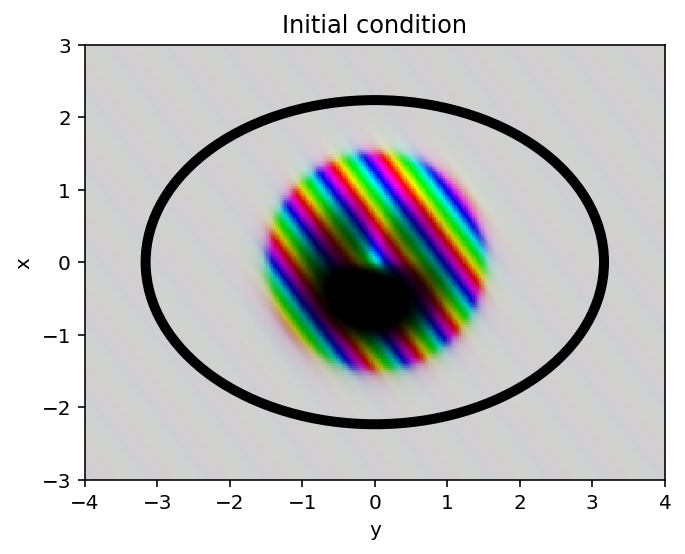

In [21]:
# Set up initial condition.
psi0 = np.exp(-2*(x**2+y**2) + 8j*y + 6j*x)
#psi0 = np.exp(-2*(x**2+y**2) + 6j*y + 4j*x)

# Create a wavefunction object
wf = FourierWavefunction(grid)
wf.setPsi(psi0,normalize=True)
visualize(wf,'Initial condition')


# Create a Strang splitting propagator
dt = 0.01 
prop = Propagator(ham, dt)

# Main simulation loop

The propagation is here. We do a nested loop, visualizing each time the outer loop advances.

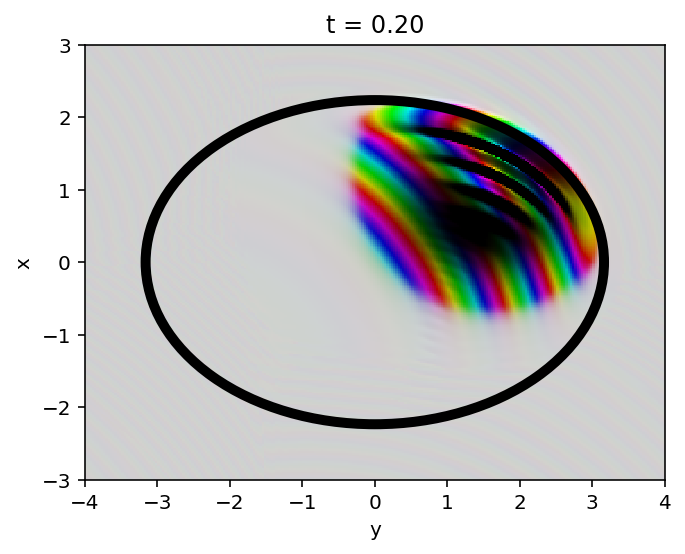

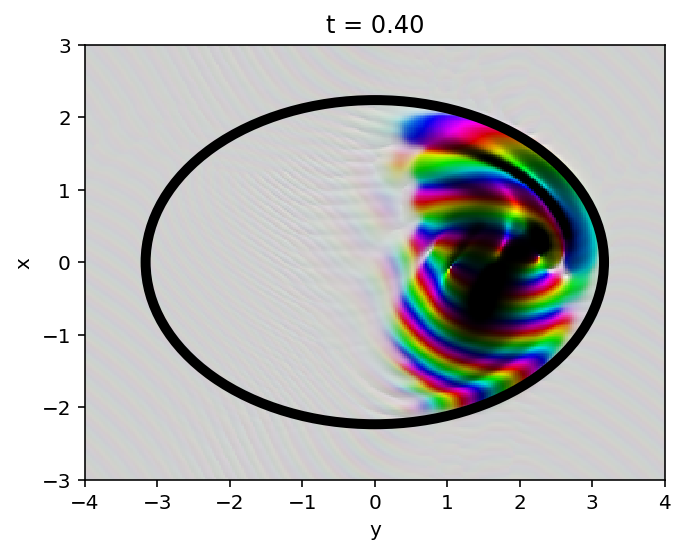

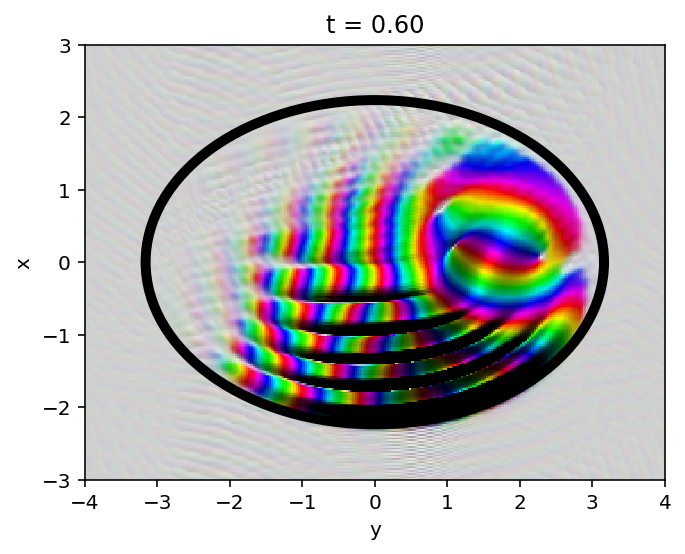

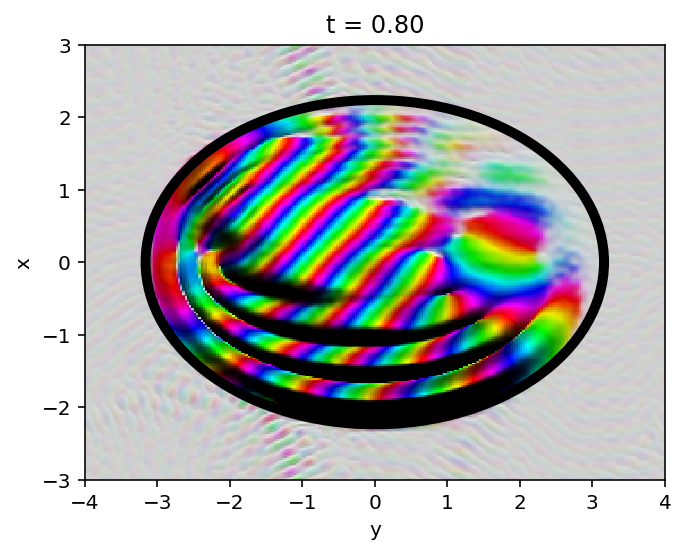

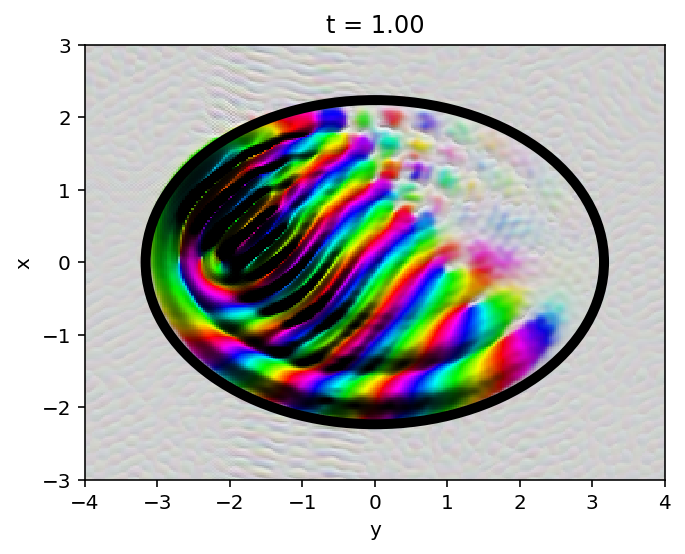

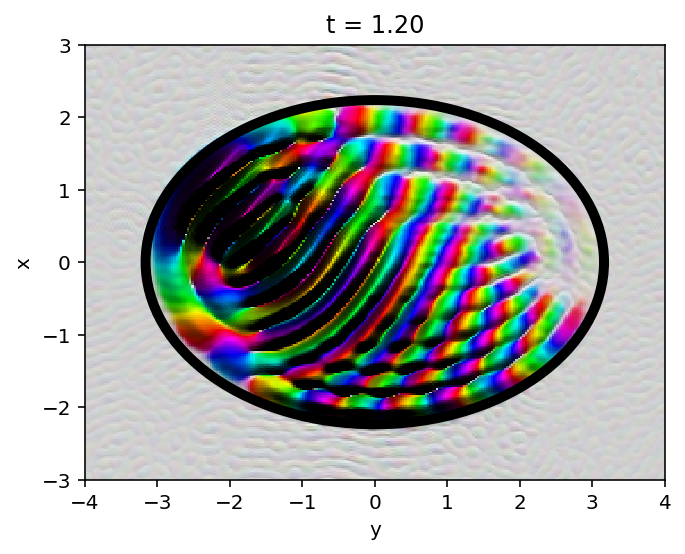

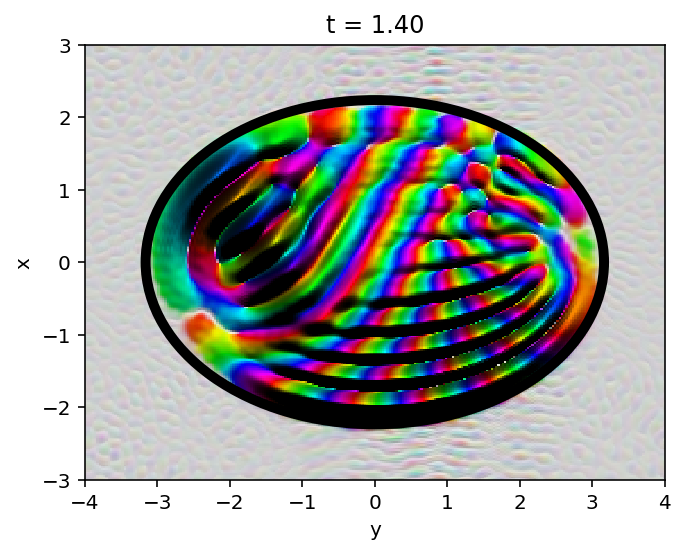

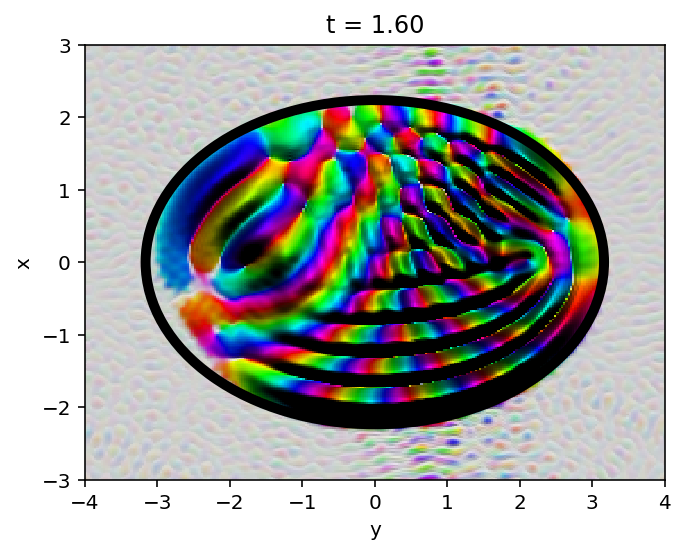

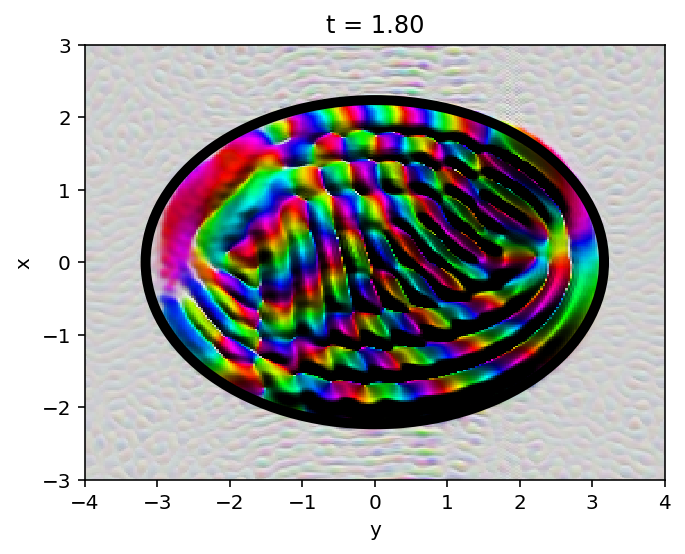

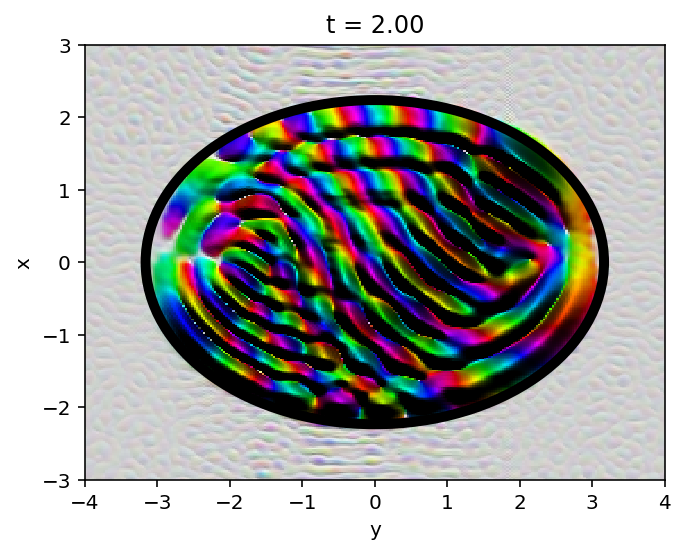

In [22]:
t = 0.0
for i in range(10):
    for k in range(20):
        prop.strang(wf,t)
        t += dt
    visualize(wf,f't = {t:.2f}')


# Make an animation and save to mp4

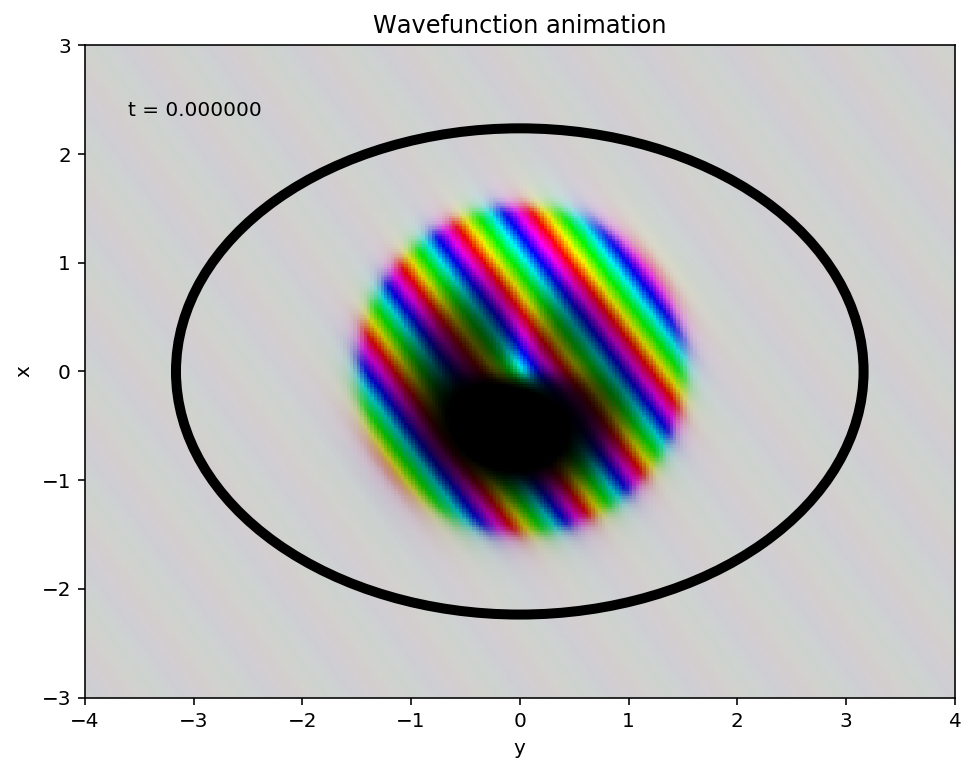

In [25]:
import matplotlib
matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend
from matplotlib import animation

# Set up initial condition.
psi0 = np.exp(-2*(x**2+y**2) + 8j*y + 6j*x)

# Create a wavefunction object
wf = FourierWavefunction(grid)
wf.setPsi(psi0,normalize=True)


# Create a Strang splitting propagator
dt = 0.005
t_final = 5
frames = int(t_final/dt)
prop = Propagator(ham, dt)
t = 0.0


fig = plt.figure(figsize=[10,6])

ax = plt.axes()

I = render2d(wf)
img1 = plt.imshow(I,aspect='equal',extent=[a[1],b[1],a[0],b[0]],origin='lower')
ax.add_patch(Ellipse((0, 0), width=r2*2, height=r1*2,edgecolor='black',
                 facecolor='none',
                 linewidth=5))   
#plt.title(heading)
plt.xlabel('y')
plt.ylabel('x')

#lines = [line1,line2,line3] #lines to animate
plt.title('Wavefunction animation')
#plt.legend(['Re psi', 'Im psi', '|psi|'])
#plt.xlabel('x')
txt = plt.text(0.05, 0.9, 't = %f' % (0), horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)



patches = [img1, txt] # things to animate

def init():
    #init lines
    wf = FourierWavefunction(grid)
    wf.setPsi(psi0,normalize=True)
    
    img1.set_data(render2d(wf))

    txt.set_text('t = %f' % (0))
    #ax.set_xlim(x0[0], x1[0])
    #ax.set_ylim(y0[0], y1[0])
    
    return patches #return everything that must be updated

def animate(i):
    #animate lines
    #lines[0].set_data(x, psi[:,i].real)
    #lines[1].set_data(x, psi[:,i].imag)
    #lines[2].set_data(x, np.abs(psi[:,i]))
    img1.set_data(render2d(wf))
    txt.set_text(f't = {i*dt:.2f}')
    prop.strang(wf, 0.0)
    #t += dt

    print(f'Frame {i}/{frames} done.')
    #ax.set_xlim(x0[i], x1[i])
    #ax.set_ylim(y0[i], y1[i])

    
    return patches #return everything that must be updated

fskip = 1
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,frames,fskip), interval=10, blit=False)

plt.show()

In [26]:
plt.rcParams['animation.ffmpeg_path'] = '/users/Simen/Downloads/ffmpeg'
FFwriter=animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('quantum_billards.mp4', writer=FFwriter)


Frame 0/1000 done.
Frame 1/1000 done.
Frame 2/1000 done.
Frame 3/1000 done.
Frame 4/1000 done.
Frame 5/1000 done.
Frame 6/1000 done.
Frame 7/1000 done.
Frame 8/1000 done.
Frame 9/1000 done.
Frame 10/1000 done.
Frame 11/1000 done.
Frame 12/1000 done.
Frame 13/1000 done.
Frame 14/1000 done.
Frame 15/1000 done.
Frame 16/1000 done.
Frame 17/1000 done.
Frame 18/1000 done.
Frame 19/1000 done.
Frame 20/1000 done.
Frame 21/1000 done.
Frame 22/1000 done.
Frame 23/1000 done.
Frame 24/1000 done.
Frame 25/1000 done.
Frame 26/1000 done.
Frame 27/1000 done.
Frame 28/1000 done.
Frame 29/1000 done.
Frame 30/1000 done.
Frame 31/1000 done.
Frame 32/1000 done.
Frame 33/1000 done.
Frame 34/1000 done.
Frame 35/1000 done.
Frame 36/1000 done.
Frame 37/1000 done.
Frame 38/1000 done.
Frame 39/1000 done.
Frame 40/1000 done.
Frame 41/1000 done.
Frame 42/1000 done.
Frame 43/1000 done.
Frame 44/1000 done.
Frame 45/1000 done.
Frame 46/1000 done.
Frame 47/1000 done.
Frame 48/1000 done.
Frame 49/1000 done.
Frame 50/1

Frame 396/1000 done.
Frame 397/1000 done.
Frame 398/1000 done.
Frame 399/1000 done.
Frame 400/1000 done.
Frame 401/1000 done.
Frame 402/1000 done.
Frame 403/1000 done.
Frame 404/1000 done.
Frame 405/1000 done.
Frame 406/1000 done.
Frame 407/1000 done.
Frame 408/1000 done.
Frame 409/1000 done.
Frame 410/1000 done.
Frame 411/1000 done.
Frame 412/1000 done.
Frame 413/1000 done.
Frame 414/1000 done.
Frame 415/1000 done.
Frame 416/1000 done.
Frame 417/1000 done.
Frame 418/1000 done.
Frame 419/1000 done.
Frame 420/1000 done.
Frame 421/1000 done.
Frame 422/1000 done.
Frame 423/1000 done.
Frame 424/1000 done.
Frame 425/1000 done.
Frame 426/1000 done.
Frame 427/1000 done.
Frame 428/1000 done.
Frame 429/1000 done.
Frame 430/1000 done.
Frame 431/1000 done.
Frame 432/1000 done.
Frame 433/1000 done.
Frame 434/1000 done.
Frame 435/1000 done.
Frame 436/1000 done.
Frame 437/1000 done.
Frame 438/1000 done.
Frame 439/1000 done.
Frame 440/1000 done.
Frame 441/1000 done.
Frame 442/1000 done.
Frame 443/100

Frame 787/1000 done.
Frame 788/1000 done.
Frame 789/1000 done.
Frame 790/1000 done.
Frame 791/1000 done.
Frame 792/1000 done.
Frame 793/1000 done.
Frame 794/1000 done.
Frame 795/1000 done.
Frame 796/1000 done.
Frame 797/1000 done.
Frame 798/1000 done.
Frame 799/1000 done.
Frame 800/1000 done.
Frame 801/1000 done.
Frame 802/1000 done.
Frame 803/1000 done.
Frame 804/1000 done.
Frame 805/1000 done.
Frame 806/1000 done.
Frame 807/1000 done.
Frame 808/1000 done.
Frame 809/1000 done.
Frame 810/1000 done.
Frame 811/1000 done.
Frame 812/1000 done.
Frame 813/1000 done.
Frame 814/1000 done.
Frame 815/1000 done.
Frame 816/1000 done.
Frame 817/1000 done.
Frame 818/1000 done.
Frame 819/1000 done.
Frame 820/1000 done.
Frame 821/1000 done.
Frame 822/1000 done.
Frame 823/1000 done.
Frame 824/1000 done.
Frame 825/1000 done.
Frame 826/1000 done.
Frame 827/1000 done.
Frame 828/1000 done.
Frame 829/1000 done.
Frame 830/1000 done.
Frame 831/1000 done.
Frame 832/1000 done.
Frame 833/1000 done.
Frame 834/100